In [32]:
# Import necessary python libraries
import numpy as np
import pandas as pd
import scipy.stats as stat
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
df = pd.read_csv("icu_csv_file.csv")
df.head(100)

,Unnamed: 0,Unnamed: 0.1,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
3,4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,...,150.761216,271.493436,4,4,4,3,4,4,4,5
4,5,6,6,W303516,2b451d12-6c2b-4cea-a295-ba1d6bced078,Fort Valley,GA,Peach,31030,32.57032,...,184.401558,1039.357983,3,3,3,2,4,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,216,217,217,M379067,3762d2ac-9505-4aeb-9b69-2a3b877a0d19,Sheffield,TX,Pecos,79781,30.59596,...,135.726965,1536.589816,3,4,4,3,3,4,2,3
96,220,221,221,N162822,12f38a21-5b5d-42db-ac08-24b65fde7390,New Bern,NC,Craven,28560,35.13427,...,159.334515,1046.054674,1,2,2,4,4,3,3,4
97,221,222,222,K618387,5b1707bb-96ab-4a7e-a79b-18d35eacf2cc,Flat Rock,MI,Wayne,48134,42.10714,...,242.077770,1204.479468,3,3,3,3,3,2,3,2
98,226,227,227,X978383,473189ac-0a84-4d46-aacb-1378602db804,Dry Prong,LA,Grant,71423,31.60806,...,178.908487,795.495736,2,3,2,4,4,2,4,2


In [59]:
print(df)

                               Interaction         City State  \
0     aa90260b-4141-4a24-8e36-b04ce1f4f77b  Point Baker    AK   
1     fb76459f-c047-4a9d-8af9-e0f7d4ac2524  West Branch    MI   
2     abfa2b40-2d43-4994-b15a-989b8c79e311      Del Mar    CA   
3     68a861fd-0d20-4e51-a587-8a90407ee574    Needville    TX   
4     2b451d12-6c2b-4cea-a295-ba1d6bced078  Fort Valley    GA   
...                                    ...          ...   ...   
4494  ce7abedd-6437-4609-9123-8a4a8234381e    Haubstadt    IN   
4495  3f3c716b-fd57-40f2-8a58-d944efcf1fd5      Machias    ME   
4496  c60df12b-a50b-4397-ae57-98381a0d3960    West Kill    NY   
4497  e8307ddf-9a01-4fff-bc59-4742e03fd24f     Mobeetie    TX   
4498  3775ccfc-0052-4107-81ae-9657f81ecdf3   Carrollton    GA   

                     County    Zip       Lat        Lng  Population      Area  \
0     Prince of Wales-Hyder  99927  56.25100 -133.37571          38     Urban   
1                    Ogemaw  48661  44.32893  -84.24080  

In [33]:
df.tail()

,Unnamed: 0,Unnamed: 0.1,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
4494,9992,9993,9993,B614851,ce7abedd-6437-4609-9123-8a4a8234381e,Haubstadt,IN,Gibson,47639,38.17985,...,137.9561,5001.371,3,2,4,3,4,3,4,3
4495,9993,9994,9994,W608373,3f3c716b-fd57-40f2-8a58-d944efcf1fd5,Machias,ME,Washington,4654,44.77104,...,163.9666,5270.238,3,3,3,4,3,4,3,3
4496,9994,9995,9995,P175475,c60df12b-a50b-4397-ae57-98381a0d3960,West Kill,NY,Greene,12492,42.18491,...,143.6879,4945.756,4,3,4,4,3,3,4,4
4497,9997,9998,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,Mobeetie,TX,Wheeler,79061,35.52039,...,168.2209,4159.306,4,4,4,4,4,4,4,5
4498,9998,9999,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,Carrollton,GA,Carroll,30117,33.58016,...,252.6286,6468.457,4,4,6,4,3,3,5,4


In [34]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
count,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,...,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000
mean,4983.705935,4984.705935,4984.705935,49152.105801,38.723219,-90.787912,9919.408758,1.169149,53.154535,32766.519327,...,174.723102,3380.530565,3.486553,3.509002,3.487442,3.511002,3.517004,3.492109,3.512558,3.481885
std,2875.653779,2875.653779,2875.653779,27592.227898,5.445910,15.244413,14663.192615,0.921349,18.047999,14182.757714,...,42.960479,2076.724568,1.023939,1.009997,1.028932,1.034767,1.028868,1.034581,1.035179,1.044292
min,0.000000,1.000000,1.000000,601.000000,17.966120,-169.615400,0.000000,0.000000,18.000000,901.210000,...,77.505230,243.261776,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2505.000000,2506.000000,2506.000000,26268.000000,35.354150,-97.196100,790.500000,1.000000,41.000000,21411.570000,...,142.215042,1282.929112,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,4996.000000,4997.000000,4997.000000,48350.000000,39.374770,-87.637850,3058.000000,1.000000,53.275748,38294.570000,...,171.217700,3398.842752,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,7456.500000,7457.500000,7457.500000,71543.500000,42.063850,-80.153925,13245.000000,2.000000,65.000000,39936.762226,...,204.457278,5445.570500,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,9998.000000,9999.000000,9999.000000,99927.000000,70.640660,-65.683060,102433.000000,3.000000,89.000000,64963.050000,...,307.528124,7015.440000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [35]:
df.shape

(4499, 53)

In [36]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'CaseOrder', 'Customer_id', 'Interaction',
       'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area',
       'Timezone', 'Job', 'Children', 'Age', 'Education', 'Employment',
       'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email',
       'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem',
       'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'item1', 'item2', 'item3',
       'item4', 'item5', 'item6', 'item7', 'item8'],
      dtype='object')

In [37]:
df.nunique()

Unnamed: 0              4499
Unnamed: 0.1            4499
CaseOrder               4499
Customer_id             4499
Interaction             4499
City                    3328
State                     52
County                  1298
Zip                     4198
Lat                     4196
Lng                     4211
Population              3374
Area                       3
Timezone                  22
Job                      638
Children                   4
Age                       73
Education                 12
Employment                 5
Income                  3235
Marital                    5
Gender                     3
Churn                      2
Outage_sec_perweek      4496
Email                     22
Contacts                   8
Yearly_equip_failure       5
Techie                     2
Contract                   3
Port_modem                 2
Tablet                     2
InternetService            3
Phone                      2
Multiple                   2
OnlineSecurity

In [38]:
df['Marital'].unique()

array(['Widowed', 'Married', 'Separated', 'Never Married', 'Divorced'],
      dtype=object)

In [39]:
#Cleaning of data
df.isnull().sum()

Unnamed: 0              0
Unnamed: 0.1            0
CaseOrder               0
Customer_id             0
Interaction             0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
Timezone                0
Job                     0
Children                0
Age                     0
Education               0
Employment              0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV 

In [51]:
df.head()

,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Job,...,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Tablet,InternetService,Phone,OnlineSecurity
0,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,Environmental health practitioner,...,6.972566,10,0,1,No,One year,Yes,Fiber Optic,Yes,Yes
1,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,"Programmer, multimedia",...,12.014541,12,0,1,Yes,Month-to-month,Yes,Fiber Optic,Yes,Yes
2,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,Solicitor,...,15.206193,15,2,0,Yes,Two Year,No,DSL,Yes,Yes
3,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,Medical illustrator,...,8.960316,16,2,1,No,Month-to-month,No,Fiber Optic,No,No
4,2b451d12-6c2b-4cea-a295-ba1d6bced078,Fort Valley,GA,Peach,31030,32.57032,-83.89040,17701,Urban,Chief Technology Officer,...,7.814859,15,3,1,No,One year,No,None,Yes,Yes


In [52]:
#relationship analysis, corelation matrix 

In [53]:
corelation = df.corr()

<AxesSubplot:>

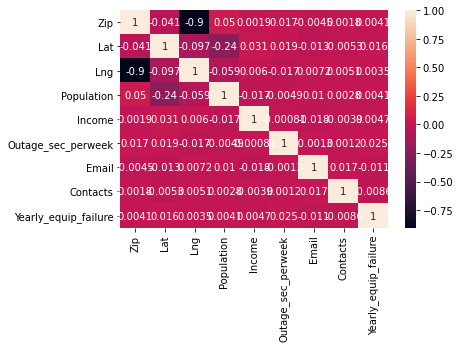

In [54]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns
           ,annot=True)

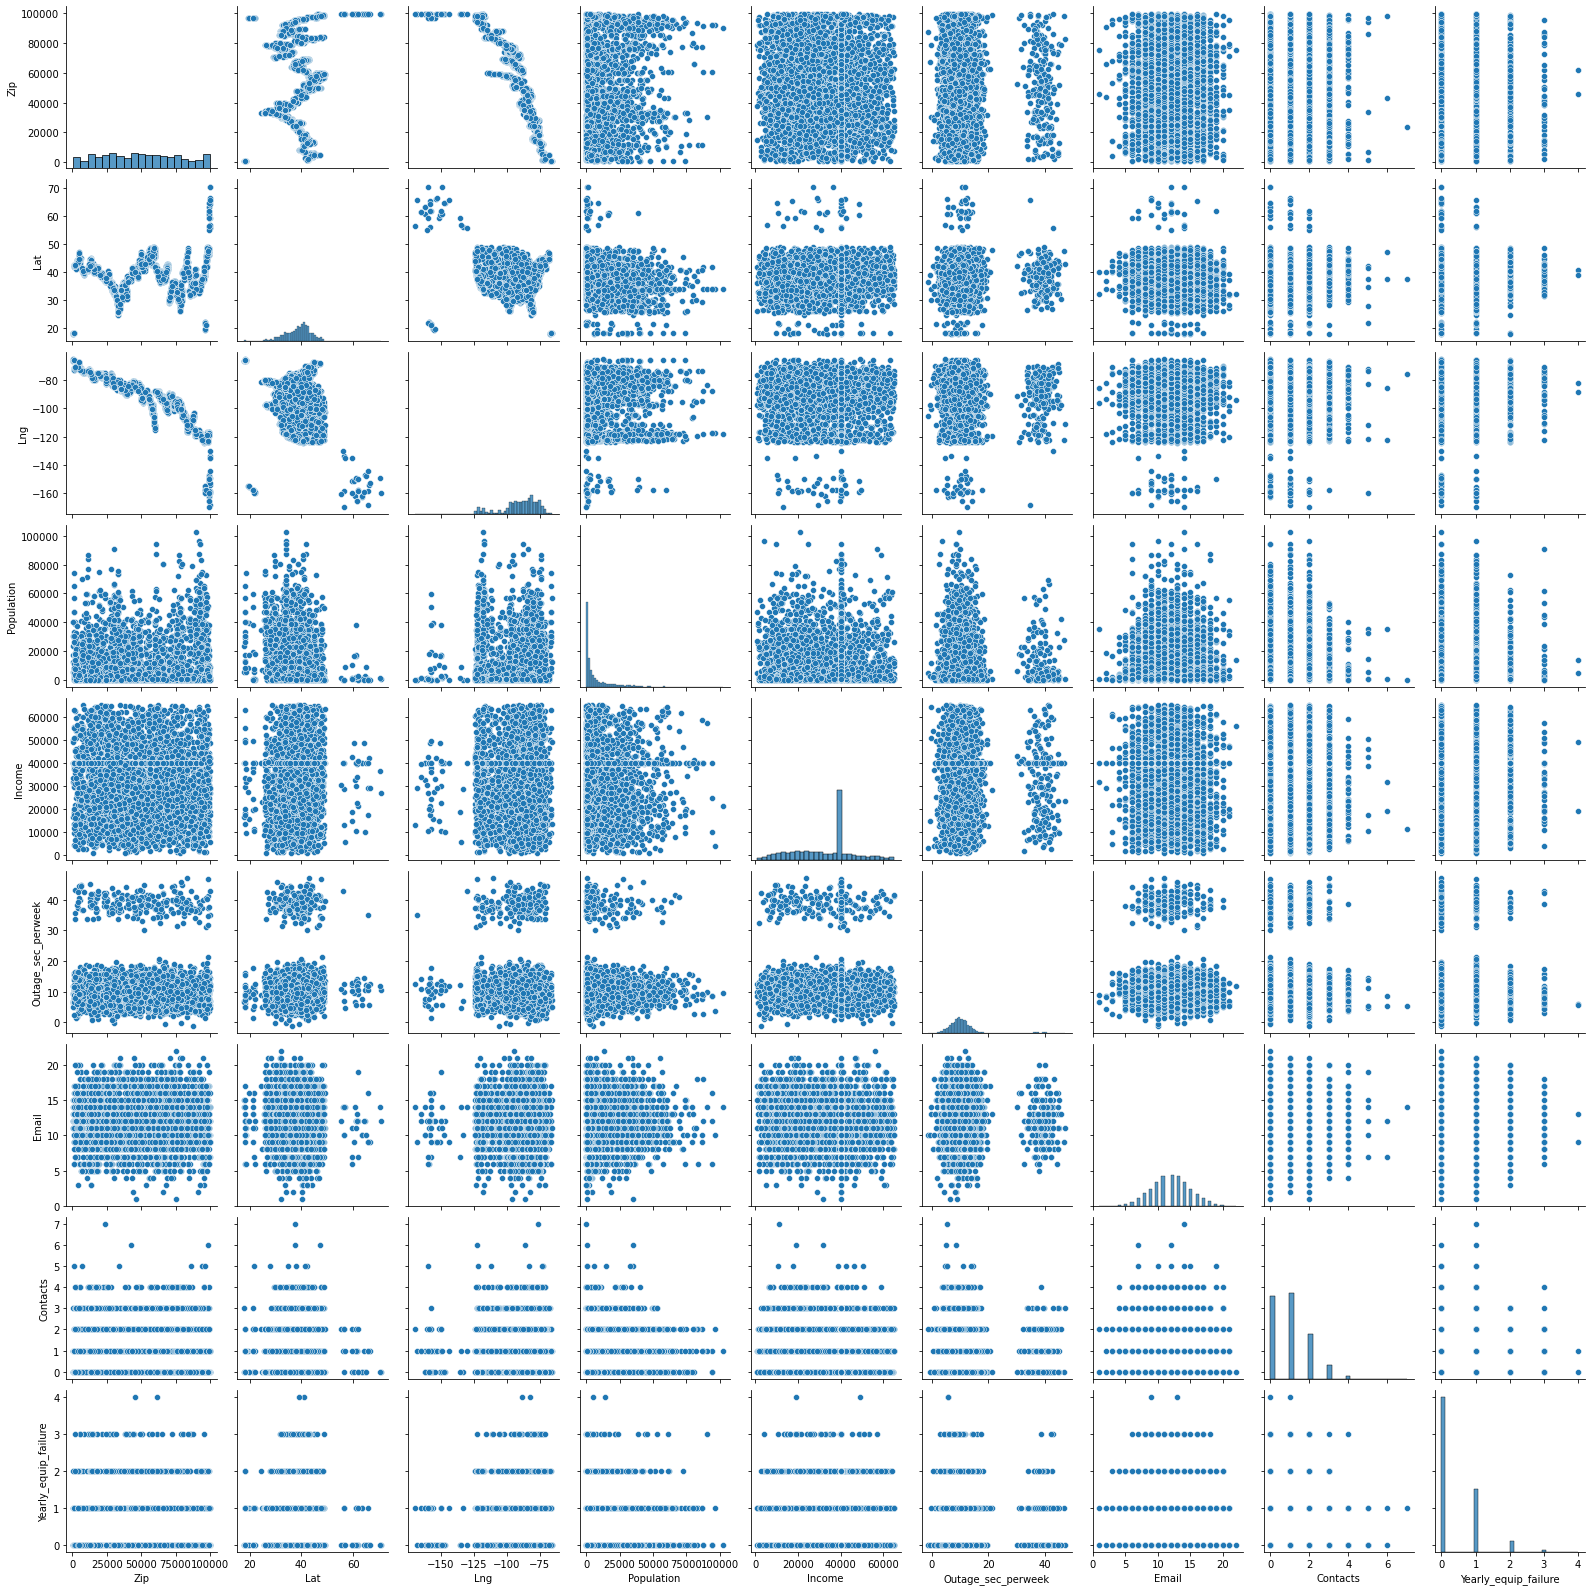

In [55]:
sns.pairplot(df)

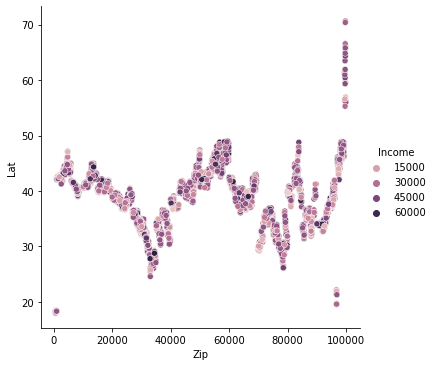

In [56]:
sns.relplot(x= 'Zip', y= 'Lat', hue= 'Income', data=df)

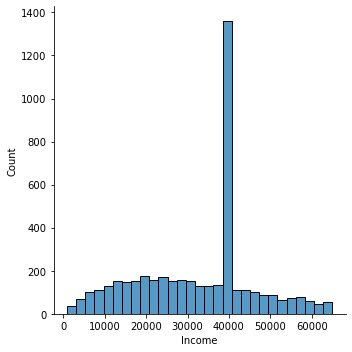

In [57]:
sns.displot(df['Income'])

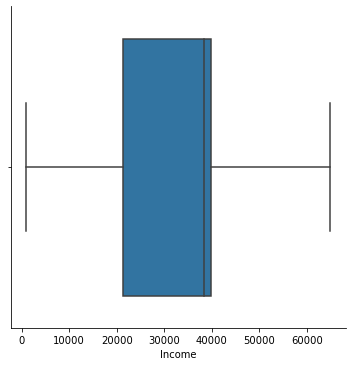

In [58]:
sns.catplot(x='Income', kind= 'box', data= df)

In [ ]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import ttest_ind
# seed the random number generator
seed(1)
# generate two independent samples
OnlineSecurity = 5 * randn(100) + 1.169
MonthlyCharge = 5 * randn(100) + 174.7
# compare samples
stat, p = ttest_ind(OnlineSecurity, MonthlyCharge)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

In [1]:
x = {12,23,45,4}
print(x)

{4, 12, 45, 23}
